In [2]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
import math
import seaborn as sn
from imblearn.over_sampling import RandomOverSampler

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv('Inputs/Layer-9/train.csv')
valid = pd.read_csv('Inputs/Layer-9/valid.csv')
test = pd.read_csv('Inputs/Layer-9/test.csv')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 168.0 MB


In [9]:
train.isna().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

In [10]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'feature_768', 'label_1', 'label_2', 'label_3',
       'label_4'],
      dtype='object', length=772)

In [11]:
valid.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'feature_768', 'label_1', 'label_2', 'label_3',
       'label_4'],
      dtype='object', length=772)

In [12]:
test.columns

Index(['ID', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_759', 'feature_760', 'feature_761', 'feature_762',
       'feature_763', 'feature_764', 'feature_765', 'feature_766',
       'feature_767', 'feature_768'],
      dtype='object', length=769)

In [13]:
def getModels():
    return {
        'svm' : svm.SVC(),
        'random_forest' : RandomForestClassifier(),
        'logistic_regression' : LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'knn' : KNeighborsClassifier()
    }

### **Label 1**

In [14]:
x_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_valid = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_test = test.drop(['ID'], axis=1)

y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
y_valid = valid[['label_1', 'label_2', 'label_3', 'label_4']]

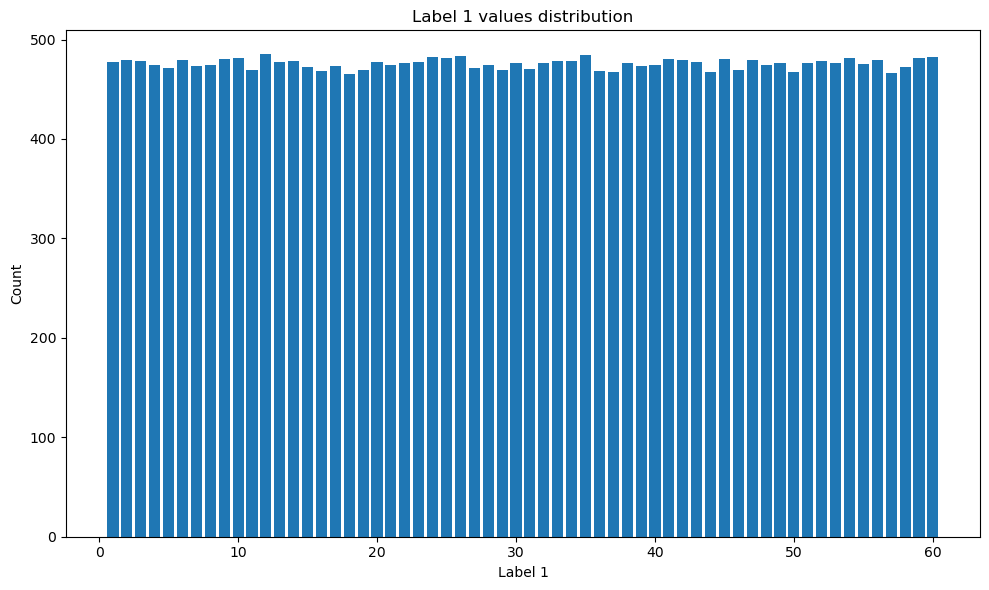

In [15]:
label1_value_counts = y_train['label_1'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(label1_value_counts.index, label1_value_counts.values)


plt.xlabel('Label 1')
plt.ylabel('Count')
plt.title('Label 1 values distribution')

plt.tight_layout() 
plt.show()

In [17]:

# scores = []
# for model_name, model in getModels().items():
#     fold_scores = cross_val_score(model, x_train, y_train['label_1'], cv=5, scoring='accuracy', n_jobs = -1)
#     scores.append({
#         'model' : model_name,
#         'score' : np.mean(fold_scores)
#     })  

# df = pd.DataFrame(scores, columns = ['model', 'score'])
# df

In [18]:
pca = PCA(n_components=0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

scores_pca = []
for model_name, model in getModels().items():
    fold_scores = cross_val_score(model, x_train_pca, y_train['label_1'], cv=3, scoring='accuracy', n_jobs = -1)
    scores_pca.append({
        'model' : model_name,
        'score' : np.mean(fold_scores)
    })  

df_pca = pd.DataFrame(scores_pca, columns = ['model', 'score'])
df_pca

,model,score
0,svm,0.933941
1,random_forest,0.849895
2,logistic_regression,0.934151
3,knn,0.873597


In [19]:
model_data = {
    'svm' : {
        'model':svm.SVC(gamma = 'auto'),
        'params' : {
            'C': [1, 10, 100],
            'kernel': ['rbf', 'linear']}
    },
    'logistic_regression' : {
        'model':LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C': [1, 10, 100]
        }
    }
}

model_data.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 100], 'kernel': ['rbf', 'linear']}}), ('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 10, 100]}})])

In [20]:
accuracy_scores = []

for model_name, model_info in model_data.items():
  clf = RandomizedSearchCV(model_info['model'], model_info['params'], cv = 3, return_train_score = False, n_jobs = -1, n_iter = 3)
  clf.fit(x_train_pca, y_train['label_1'])
  accuracy_scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

In [21]:
df_hyp_tuning = pd.DataFrame(accuracy_scores, columns = ['model', 'best_score', 'best_params'])
df_hyp_tuning

,model,best_score,best_params
0,svm,0.939095,"{'kernel': 'rbf', 'C': 100}"
1,logistic_regression,0.946459,{'C': 10}


In [28]:
best_model_l1 = LogisticRegression(C=100)
best_model_l1.fit(x_train_pca, y_train['label_1'])

#cross validation for best model using validation set
cross_val_score(best_model_l1, x_val_pca, y_valid['label_1'], cv=3, scoring='accuracy', n_jobs = -1)

/Users/hiruna/mambaforge/envs/ML-Lab2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hiruna/mambaforge/envs/ML-Lab2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

array([0.516, 0.556, 0.596])

In [29]:
y_test_label1 = best_model_l1.predict(x_test_pca)
y_test_label1.shape

(744,)

## **Label 2**

In [30]:
train['label_2'].isnull().sum()

480

In [31]:
valid['label_2'].isnull().sum()

14

In [32]:
train_l2 = train.dropna(subset = ['label_2'])
train_l2['label_2'].isnull().sum()

0

In [33]:
valid_l2 = valid.dropna(subset = ['label_2'])
valid_l2['label_2'].isnull().sum()

0

In [34]:
x_train = train_l2.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_valid = valid_l2.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_test = test.drop(['ID'], axis=1)

y_train = train_l2[['label_1', 'label_2', 'label_3', 'label_4']]
y_valid = valid_l2[['label_1', 'label_2', 'label_3', 'label_4']]

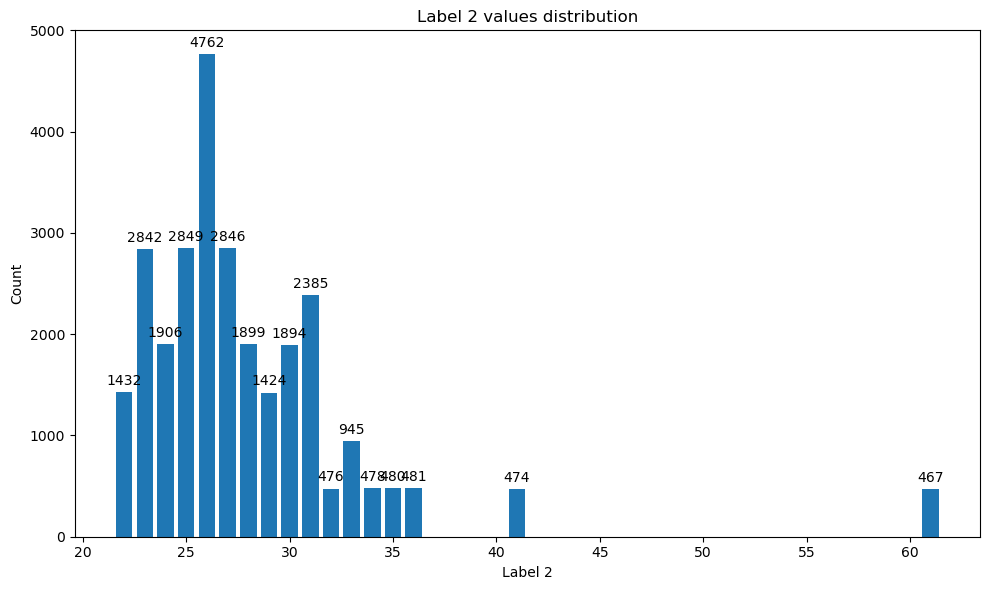

In [35]:
label2_value_counts = y_train['label_2'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(label2_value_counts.index, label2_value_counts.values)


plt.xlabel('Label 2')
plt.ylabel('Count')
plt.title('Label 2 values distribution')

for bar, count in zip(bars, label2_value_counts.values):
    plt.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.tight_layout() 
plt.show()

In [36]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [37]:
# scores = []
# for model_name, model in getModels().items():
#     fold_scores = cross_val_score(model, x_train_scaled, y_train['label_2'], cv=3, scoring='accuracy', n_jobs = -1)
#     scores.append({
#         'model' : model_name,
#         'score' : np.mean(fold_scores)
#     })  

# df_raw = pd.DataFrame(scores, columns = ['model', 'score'])
# df_raw

In [38]:
pca = PCA(n_components=0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)
x_test_pca = pca.transform(x_test_scaled)

scores_pca = []
for model_name, model in getModels().items():
    fold_scores = cross_val_score(model, x_train_pca, y_train['label_2'], cv=3, scoring='accuracy', n_jobs = -1)
    scores_pca.append({
        'model' : model_name,
        'score' : np.mean(fold_scores)
    })  

df_pca = pd.DataFrame(scores_pca, columns = ['model', 'score'])
df_pca

,model,score
0,svm,0.341226
1,random_forest,0.250213
2,logistic_regression,0.297895
3,knn,0.331204


In [41]:
model_data = {
    'svm' : {
        'model':svm.SVC(gamma = 'auto'),
        'params' : {
            'C': [1, 10, 100],
            'kernel': ['rbf', 'linear']}
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : list(range(1,5)),
            'p' : [1,2]
        }
    }
}

model_data.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 100], 'kernel': ['rbf', 'linear']}}), ('knn', {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [1, 2, 3, 4], 'p': [1, 2]}})])

In [42]:
accuracy_scores = []

for model_name, model_info in model_data.items():
  clf = RandomizedSearchCV(model_info['model'], model_info['params'], cv = 3, return_train_score = False, n_jobs = -1, n_iter = 5)
  clf.fit(x_train_pca, y_train['label_2'])
  accuracy_scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

In [ ]:
df_hyp_tuning = pd.DataFrame(accuracy_scores, columns = ['model', 'best_score', 'best_params'])
df_hyp_tuning

,model,best_score,best_params
0,svm,0.328280,"{'C': 10, 'kernel': 'linear'}"
1,logistic_regression,0.324179,{'C': 100}
2,knn,0.354635,"{'n_neighbors': 1, 'p': 2}"


In [ ]:
best_model_l2 = KNeighborsClassifier(n_neighbors = 1, p = 2)
best_model_l2.fit(x_train_pca, y_train['label_2'])

#cross validation for best model using validation set
fold_scores_l2 = cross_val_score(best_model_l2, x_val_pca, y_valid['label_2'], cv=3, scoring='accuracy', n_jobs = -1)
np.mean(fold_scores_l2)

0.8899456521739131

In [ ]:
y_test_label2 = best_model_l2.predict(x_test_pca)
y_test_label2.shape

array([22., 25., 30., 27., 29., 30., 27., 33., 23., 22., 26., 25., 27.,
       26., 23., 26., 28., 25., 31., 29., 33., 24., 29., 22., 61., 25.,
       28., 23., 25., 26., 23., 30., 30., 24., 28., 28., 24., 25., 26.,
       25., 23., 23., 25., 30., 31., 22., 26., 32., 25., 23., 22., 24.,
       29., 27., 23., 23., 30., 34., 28., 25., 30., 23., 23., 26., 28.,
       25., 25., 25., 22., 32., 33., 26., 61., 30., 23., 31., 26., 26.,
       27., 26., 34., 32., 23., 23., 23., 26., 31., 23., 26., 29., 22.,
       31., 25., 23., 27., 30., 31., 25., 27., 29., 23., 22., 26., 22.,
       24., 36., 26., 26., 32., 25., 27., 27., 26., 24., 30., 30., 26.,
       25., 25., 26., 23., 26., 41., 33., 32., 28., 29., 35., 34., 25.,
       23., 27., 36., 23., 28., 22., 29., 27., 30., 31., 28., 25., 26.,
       31., 23., 61., 30., 23., 33., 30., 29., 27., 23., 24., 31., 26.,
       23., 25., 28., 41., 31., 25., 25., 28., 30., 28., 30., 26., 26.,
       25., 23., 27., 31., 30., 33., 24., 25., 34., 30., 23., 27

### **Label 3**

In [20]:
train['label_3'].isnull().sum()

0

In [21]:
valid['label_3'].isnull().sum()

0

In [22]:
x_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_valid = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_test = test.drop(['ID'], axis=1)

y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
y_valid = valid[['label_1', 'label_2', 'label_3', 'label_4']]

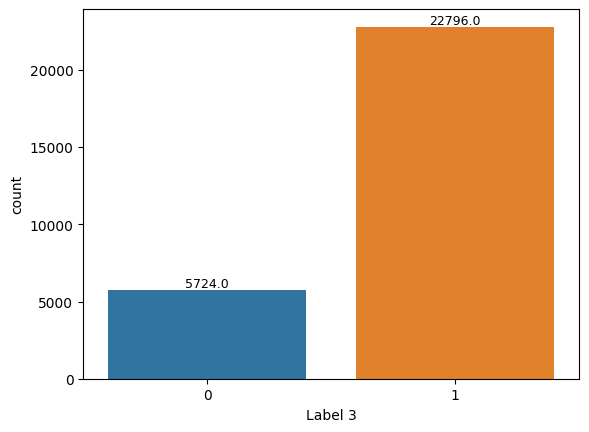

In [23]:
ax = sn.countplot(x=y_train['label_3'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Label 3')

plt.show()

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [38]:
# scores = []
# for model_name, model in getModels().items():
#     fold_scores = cross_val_score(model, x_train_scaled, y_train['label_3'], cv=3, scoring='accuracy', n_jobs = -1)
#     scores.append({
#         'model' : model_name,
#         'score' : np.mean(fold_scores)
#     })  

# df_raw = pd.DataFrame(scores, columns = ['model', 'score'])
# df_raw

,model,score
0,svm,0.976262
1,random_forest,0.905434
2,logistic_regression,0.977910
3,knn,0.907889


In [39]:
pca = PCA(n_components=0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_valid_scaled)
x_test_pca = pca.transform(x_test_scaled)

scores_pca = []
for model_name, model in getModels().items():
    fold_scores = cross_val_score(model, x_train_pca, y_train['label_3'], cv=3, scoring='accuracy', n_jobs = -1)
    scores_pca.append({
        'model' : model_name,
        'score' : np.mean(fold_scores)
    })  

df_pca = pd.DataFrame(scores_pca, columns = ['model', 'score'])
df_pca

,model,score
0,svm,0.975525
1,random_forest,0.871108
2,logistic_regression,0.976157
3,knn,0.909432


In [40]:
model_data = {
    'svm' : {
        'model':svm.SVC(gamma = 'auto'),
        'params' : {
            'C': [1, 10, 100],
            'kernel': ['rbf', 'linear']}
    },
    'logistic_regression' : {
        'model':LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C': [1, 10, 100]
        }
    }
}

model_data.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 100], 'kernel': ['rbf', 'linear']}}), ('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 10, 100]}})])

In [41]:
accuracy_scores = []

for model_name, model_info in model_data.items():
  clf = RandomizedSearchCV(model_info['model'], model_info['params'], cv = 3, return_train_score = False, n_jobs = -1, n_iter = 3)
  clf.fit(x_train_pca, y_train['label_3'])
  accuracy_scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

In [42]:
df_hyp_tuning = pd.DataFrame(accuracy_scores, columns = ['model', 'best_score', 'best_params'])
df_hyp_tuning

,model,best_score,best_params
0,svm,0.980049,"{'C': 100, 'kernel': 'rbf'}"
1,logistic_regression,0.977910,{'C': 1}


In [43]:
best_model_l3 = svm.SVC(C = 100, kernel = 'rbf')
best_model_l3.fit(x_train_pca, y_train['label_3'])

#cross validation for best model using validation set
fold_scores_l3 = cross_val_score(best_model_l3, x_val_pca, y_valid['label_3'], cv=3, scoring='accuracy', n_jobs = -1)
np.mean(fold_scores_l3)

0.996

In [44]:
y_test_label3 = best_model_l3.predict(x_test_scaled)
y_test_label3.shape

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### **Label 4**

In [24]:
train['label_4'].isnull().sum()

0

In [25]:
valid['label_4'].isnull().sum()

0

In [26]:
x_train = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_valid = valid.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
x_test = test.drop(['ID'], axis=1)

y_train = train[['label_1', 'label_2', 'label_3', 'label_4']]
y_valid = valid[['label_1', 'label_2', 'label_3', 'label_4']]

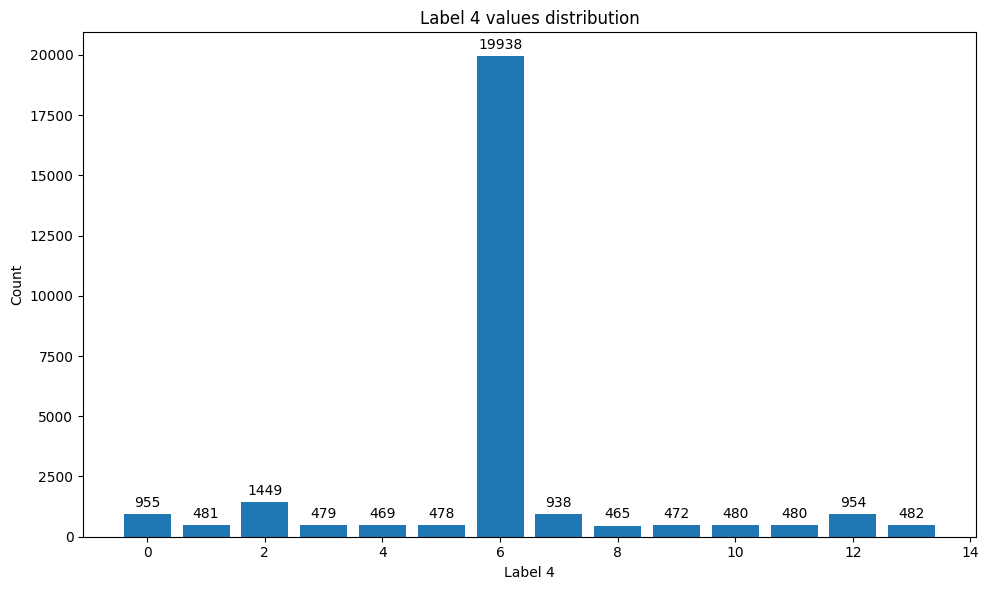

In [27]:
label4_value_counts = y_train['label_4'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(label4_value_counts.index, label4_value_counts.values)


plt.xlabel('Label 4')
plt.ylabel('Count')
plt.title('Label 4 values distribution')

for bar, count in zip(bars, label4_value_counts.values):
    plt.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.tight_layout() 
plt.show()

In [49]:
sampler = RandomOverSampler(random_state=0)
x_train_resampled, y_train_resampled = sampler.fit_resample(x_train, y_train['label_4'])

In [50]:
label4_value_counts = y_train_resampled.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(label4_value_counts.index, label4_value_counts.values)


plt.xlabel('Label 4')
plt.ylabel('Count')
plt.title('Label 4 values distribution after OverSampling')

for bar, count in zip(bars, label4_value_counts.values):
    plt.annotate(str(count), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


plt.tight_layout() 
plt.show()

In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [53]:

# scores = []
# for model_name, model in getModels().items():
#     model.fit(x_train_scaled, y_train_resampled['label_4'])
#     pred = model.predict(x_valid_scaled)
    
#     scores.append({
#         'model' : model_name,
#         'score' : accuracy_score(y_valid['label_4'], pred)
#     })  

# df_raw = pd.DataFrame(scores, columns = ['model', 'score'])
# df_raw

,model,score
0,svm,0.957333
1,random_forest,0.764000
2,logistic_regression,0.952000
3,knn,0.930667


In [55]:
pca = PCA(n_components=0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train_scaled)
x_val_pca = pca.transform(x_valid_scaled)
x_test_pca = pca.transform(x_test_scaled)

scores_pca = []
for model_name, model in getModels().items():    
    model.fit(x_train_pca, y_train_resampled['label_4'])
    pred = model.predict(x_val_pca)
    
    scores_pca.append({
        'model' : model_name,
        'score' : accuracy_score(y_valid['label_4'], pred)
    })  

df_pca = pd.DataFrame(scores_pca, columns = ['model', 'score'])
df_pca

,model,score
0,svm,0.956000
1,random_forest,0.732000
2,logistic_regression,0.918667
3,knn,0.930667


In [56]:
model_data = {
    'svm' : {
        'model':svm.SVC(gamma = 'auto'),
        'params' : {
            'C': [1, 10, 100],
            'kernel': ['rbf', 'linear']}
    },
    'logistic_regression' : {
        'model':LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C': [1, 10, 100]
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : list(range(1,5)),
            'p' : [1,2]
        }
    }
}

model_data.items()

dict_items([('svm', {'model': SVC(gamma='auto'), 'params': {'C': [1, 10, 100], 'kernel': ['rbf', 'linear']}}), ('logistic_regression', {'model': LogisticRegression(solver='liblinear'), 'params': {'C': [1, 10, 100]}}), ('knn', {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [1, 2, 3, 4], 'p': [1, 2]}})])

In [60]:
accuracy_scores = []

for model_name, model_info in model_data.items():
  clf = RandomizedSearchCV(model_info['model'], model_info['params'], cv = 3, return_train_score = False, n_jobs = -1, n_iter = 5)
  clf.fit(x_train_pca, y_train_resampled['label_4'])
  accuracy_scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })

In [59]:
df_hyp_tuning = pd.DataFrame(accuracy_scores, columns = ['model', 'best_score', 'best_params'])
df_hyp_tuning

,model,best_score,best_params
0,svm,0.850210,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.845477,{'C': 100}
2,knn,0.811044,"{'n_neighbors': 4, 'p': 1}"


In [66]:
best_model_l4 = svm.SVC(C=1, kernel='linear')
best_model_l4.fit(x_train_pca, y_train_resampled['label_4'])

#cross validation for best model using validation set
fold_scores_l4 = cross_val_score(best_model_l4, x_val_pca, y_valid['label_3'], cv=3, scoring='accuracy', n_jobs = -1)
np.mean(fold_scores_l4)

0.9493333333333334

In [67]:
y_test_label4 = best_model_l4.predict(x_test_pca)
y_test_label4

array([ 2,  8,  6,  6,  6,  6,  6,  6,  6,  2,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  0,  6,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  8,  4,  3,  6,  6,  6,  1,  6, 12,  6,  0,  1,
        6,  6,  7,  0,  6,  6,  5,  6,  6,  6,  3,  6,  2,  6,  8,  6,  6,
        6, 12,  6,  6,  6,  6,  6,  6,  6,  1,  6,  6,  5, 12,  6,  6,  6,
        6, 12,  4,  6,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  0,  4,  2,
        6,  6,  6,  6,  6,  6, 12,  6,  6,  7,  6,  6,  6,  6,  6,  6,  0,
        6,  4,  6,  6,  6, 12,  9,  6, 11,  5,  6,  6,  6,  6,  6,  6,  1,
        0,  6,  6,  7,  6,  6,  6,  7,  0,  6,  6,  6,  6,  6,  0,  7,  3,
        6,  6, 10,  4,  6,  9,  6,  6,  8,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  0, 12,  6,  6,  6,  6,  5, 10,  6,  6,  8,  6,  4,  7,  6,  6,
        6,  6,  2,  6,  5,  6,  7,  6,  6,  6,  6,  6,  6,  6, 13,  8,  6,
        6, 11,  6,  1,  6,  2,  6,  6,  6,  6,  6,  6,  6,  3, 12,  6,  6,
        6,  6,  7,  6,  6

In [68]:
final_df = test[['ID']]
final_df['label_1'] = y_test_label1
final_df['label_2'] = y_test_label2
final_df['label_3'] = y_test_label3
final_df['label_4'] = y_test_label4

In [69]:
final_df.to_csv('Outputs/Layer-9/solutions_layer9.csv', index=False)